In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.sparse as sp
import numpy as np

f = lambda x, y: np.sin(x)*np.cos(y)

n = 100
h = 1/n
nnz = n*4 + 5*(n-1)**2
row = np.zeros(nnz)
col = np.zeros(nnz)
data = np.zeros(nnz)
b = np.zeros((n+1)**2) # b is the right hand side of the linear system

iterator = 0
for i in range(n+1):
    for j in range(n+1):
        k = i*(n+1)+j
        if i in (0, n) or j in (0, n): # this corresponds to the bdry
            row[iterator] = k
            col[iterator] = k
            data[iterator] = 1
            iterator += 1
        else:  # this corresponds to the interior
            row[iterator] = k
            col[iterator] = k
            data[iterator] = 4
            row[iterator+1] = k
            col[iterator+1] = k+1
            data[iterator+1] = -1
            row[iterator+2] = k
            col[iterator+2] = k-1
            data[iterator+2] = -1
            row[iterator+3] = k
            col[iterator+3] = k+n+1
            data[iterator+3] = -1
            row[iterator+4] = k
            col[iterator+4] = k-n-1
            data[iterator+4] = -1
            iterator += 5
            b[k] = f(i*h, j*h)*h**2
            
A = sp.csr_matrix((data, (row, col)), shape=((n+1)**2, (n+1)**2))
print(A.toarray())


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


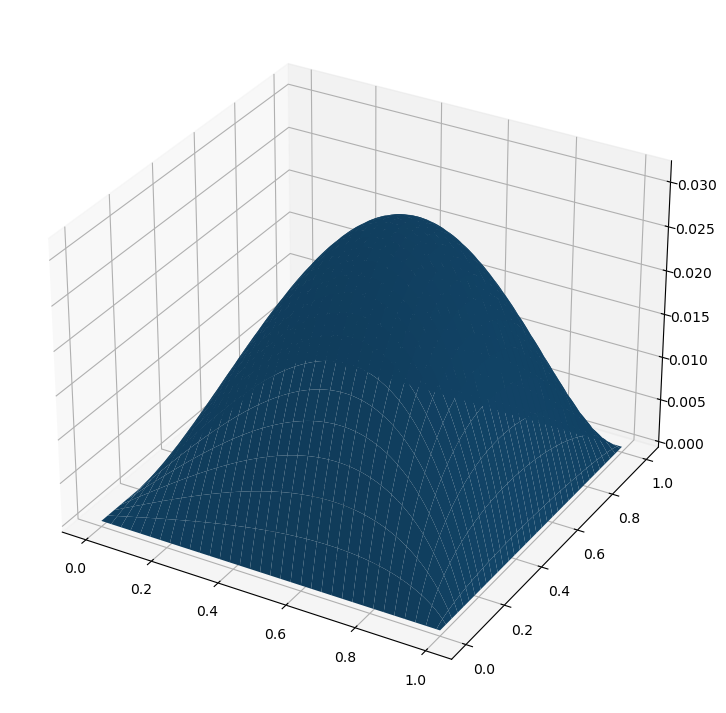

In [14]:
import scipy.sparse.linalg as lin
v = lin.spsolve(A,b)
u = np.reshape(v,(n+1,n+1))
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
x = np.outer(np.linspace(0,1,n+1), np.ones(n+1))
y = x.copy().T
ax.plot_surface(x,y,u)